<a href="https://colab.research.google.com/github/mccoy0928/20220702-Python/blob/main/20220716_McCoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://zerojudge.tw/ 可練習寫寫

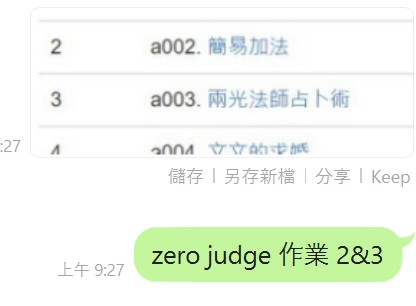

# 基本語法
## 基本語法
### 基本語法
* 迴圈 loops
* 函式 functions
* 條件式 if statements
* 例外處理 Exception Handling

### 例外處理

In [ ]:
def add(x, y):
  print(f"{x}+{y}={x+y}")
def sub(x, y):
  print(f"{x}-{y}={x-y}")
def mul(x, y):
  print(f"{x}*{y}={x*y}")
def div(x, y):
  print(f"{x}/{y}={x/y}")

In [ ]:
functions = [add, div, mul, sub]

In [ ]:
x=5
y=2
for func in functions:
  func(x, y)

5+2=7
5/2=2.5
5*2=10
5-2=3


In [ ]:
x=5
y=0
for func in functions:
  try :
    func(x, y)
  except Exception as e:
    print(e.args)

5+0=5
('division by zero',)
5*0=0
5-0=5


# 20220716 資料分析

* Numpy  
 * ==>科學運算基礎套件
* MatPlotLib 
 * ==>Matrix Plotting Library繪圖基礎套件
* Pandas 
 * ==> Panel Datas 資料分析套件

```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

```

## Numpy
* new data type
 * ndarray
* new functions to process data
 * ufunc=>Universal Functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 執行原生python遇上的問題

In [ ]:
x1 = [1, 2, 3]
x2 = [4, 5, 6]

In [ ]:
x1+x2 #把x1&x2當成list處理相加

[1, 2, 3, 4, 5, 6]

In [ ]:
# 向量相加
x3=[]
for i, j in zip(x1, x2):
  x3.append(i + j)
x3 # 真實會要的向量相加

[5, 7, 9]

# Numpy用來做甚麼

### ndarray 多維陣列

In [ ]:
import numpy as np

In [ ]:
x1

[1, 2, 3]

In [ ]:
x2

[4, 5, 6]

In [ ]:
y1 =np.array(x1)
y2 = np.array(x2)

In [ ]:
y1+y2

array([5, 7, 9])

In [ ]:
2*y1

array([2, 4, 6])

### ufunc 通用函式

In [ ]:
# 在原生python中
import math

In [ ]:
math.sin(math.pi/2)

1.0

In [ ]:
math.sin(1)

0.8414709848078965

In [ ]:
math.sin(x1)

TypeError: ignored

In [ ]:
# 在numpy中
np.sin(x1)

In [ ]:
np.sin(np.pi/2)

### 什麼地方會用到ndarrary

In [ ]:
import cv2

In [ ]:
im = cv2.imread('test.jpg')  #image read

In [ ]:
type(im)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(im)

# 如何用python畫地圖

## LBS:Location-Based service
Folium
https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [ ]:
import folium
m = folium.Map(location=[22.6273, 120.304], zoom_start=16)

In [ ]:
m

In [ ]:
# 存網頁
m.save("map.html")

In [ ]:
m = folium.Map(location=[22.6273, 120.314], zoom_start=16)
folium.Marker([22.6273, 120.314], popup="高雄市").add_to(m)
m
#m.save("map.html")

### 使用geocoder查詢GPS座標

In [ ]:
!pip install geocoder

In [ ]:
import geocoder

In [ ]:
test= geocoder.osm("台北市").latlng
type(test)

### 練習請畫出台北市中心點地圖

In [ ]:
lookup="台北市"
#lookup= input()
locationpoint=geocoder.osm(lookup).latlng
m = folium.Map(location=locationpoint, zoom_start=12)
folium.Marker(locationpoint, popup=lookup).add_to(m)
m

In [ ]:
def drawmap(lookup):
  locationpoint=geocoder.osm(lookup).latlng
  m = folium.Map(location=locationpoint, zoom_start=16)
  folium.Marker(locationpoint, popup=lookup).add_to(m)
  return m

In [ ]:
drawmap("文藻外語大學")

##練習 到政府資料開放平台，下載北市U-Bike資料到地圖上

https://data.gov.tw/dataset/137993
https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json

In [ ]:
import requests

In [ ]:
url = "https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json"

In [ ]:
data = requests.get(url).json()

In [ ]:
len(data)

In [ ]:
data[0]

In [ ]:
for i in data:
  print(f"{i['sna'][11:]} ==>({i['lat']},{i['lng']})")

In [ ]:
def listout(myDa):
  x=data[myDa]['lat']
  y=data[myDa]['lng']
  z=data[myDa]['sna']
  print(str(x)+" "+str(y)+"\n"+z[11:]) 

In [ ]:
for i in range(len(data)):
  listout(i)


## 測試地圖上標示站名

In [ ]:
def listout(myDa):
  x=data[myDa]['lat']
  y=data[myDa]['lng']
  z=data[myDa]['sna']
  #print(str(x)+" "+str(y)+"\n"+z[11:])
  return x, y, z[11:] 

In [ ]:
listout(100)
x

In [ ]:
#listout(0)
for i in data:
  folium.Marker([i['lat'],i['lng']], popup= i['sna'], icon=folium.Icon(color="red")).add_to(m) 


In [ ]:
m

## python影像處理
*pillow  https://pillow.readthedocs.io/en/stable/


## 載入需要模組

In [ ]:
from PIL import Image

## 讀取圖形


In [ ]:
im=Image.open("test.jpg")

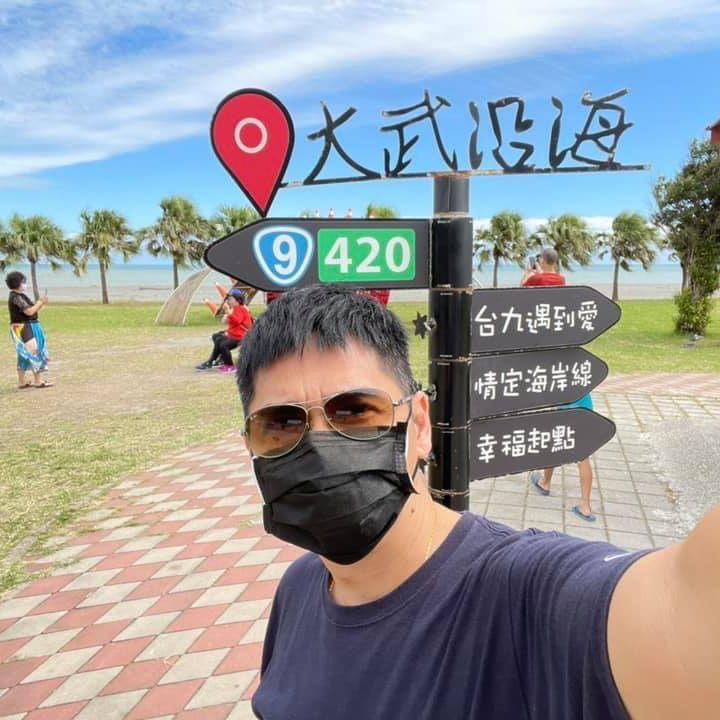

In [ ]:
im

## 讀取圖片資訊

In [ ]:
im.size

(720, 720)

In [ ]:
im.mode

'RGB'

In [ ]:
im.format

'JPEG'

## 轉換成黑白

In [ ]:
im_gray=im.convert("L")

In [ ]:
im_gray.save("testgray.jpg")

## 圖片縮放
* resize
  * Signature: im.resize(size, resample=3, box=None, reducing_gap=None)
  * Docstring:
Returns a resized copy of this image.

  * :param size: The requested size in pixels, as a 2-tuple:
   (width, height)
* thumbnail
  * Signature: im.thumbnail(size, resample=3, reducing_gap=2.0)
  * :param size: Requested size.


In [ ]:
im.size

(720, 720)

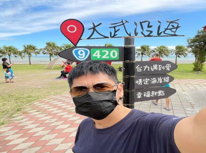

In [ ]:
im.resize((206,153)) 

In [ ]:
im2=Image.open("testgray.jpg")

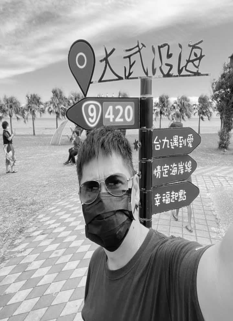

In [ ]:
im2.resize((233,321))

In [ ]:
im2.size

(720, 720)

In [ ]:
# width
a=im.size[0]

In [ ]:
# height
b=im.size[1]

In [ ]:
im2 = im.resize((a//4, b//4))  # // 整除為int

In [ ]:
im2.size

(104, 76)

## thumbnail 依照原圖比例縮放

In [ ]:
im.thumbnail?

In [ ]:
im3 = im2.copy()

In [ ]:
im3.thumbnail((100,80))

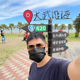

In [ ]:
im3

## 分離&合併色層

In [ ]:
r,g,b=im3.split()
im4 = Image.merge("RGB", (b, g, r))

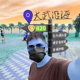

In [ ]:
im4

## 圖片旋轉
* transpose
```
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out = im.transpose(Image.ROTATE_90)
out = im.transpose(Image.ROTATE_180)
out = im.transpose(Image.ROTATE_270)

```
* rotate


In [ ]:
im3.transpose?

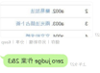

In [ ]:
im3.transpose(Image.FLIP_LEFT_RIGHT)

In [ ]:
im3.rotate?

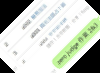

In [ ]:
im3.rotate(45)

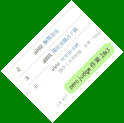

In [ ]:
im3.rotate(45, expand=True, fillcolor="green")

## 貼圖

In [ ]:
im2.size

(104, 76)

In [ ]:
im4.size

(100, 73)

In [ ]:
im2.paste?

In [ ]:
im5 = im2.copy()

In [ ]:
im5.paste(im4,(100, 100))

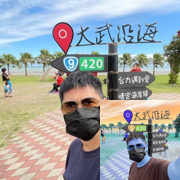

In [ ]:
im5

## 製作QR code
https://pypi.org/project/qrcode/

In [ ]:
!pip install qrcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.2 MB/s 
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40402 sha256=94961b069286c1a15c39080a6a3f1b2c10586cf877795c9ab5553140e0f7a0ac
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built qrcode


In [ ]:
import qrcode
img=qrcode.make("http://lasertek.com.tw/website/home/index.php")
img.save("lasertek.png")

In [ ]:
im6=Image.open('lasertek.png')

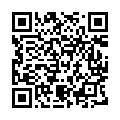

In [ ]:
im6.resize((120,120))

In [ ]:
im7=im2.copy()

In [ ]:
im7.paste(im6,(200,300))

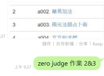

In [ ]:
im7

## Home Work:
用gradio做一個app, 輸入一張圖片，輸出加上QRcode的圖片


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import os

In [116]:
test=Image.open("suzhou.JPG")

In [117]:
test.size

(1440, 1080)

In [ ]:
# Hint

def process(input):
  r,g,b=im3.split()
  return Image.merge("RGB", (b, g, r))

In [118]:
# add QRcode
def addQR(input):
  im8=input.copy()
  im10=Image.open('lasertek.png')
  im10.thumbnail((200,200))  # 等比例縮放
  im8.paste(im10,(100,800))
  return im8

In [119]:
# gr.Interface(process, gr.inputs.Image(type='pil'), gr.outputs.Image(type='pil'), title="變色處理").launch(share=True)
gr.Interface(addQR, gr.inputs.Image(type='pil'), gr.outputs.Image(type='pil'), title="Photo Add QRcode").launch(share=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://52833.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f93cf565610>,
 'http://127.0.0.1:7868/',
 'https://52833.gradio.app')

In [ ]:
from PIL import ImageDraw

In [ ]:
# ImageDraw.Draw?

In [ ]:
im8=im2.copy()

im10=Image.open('lasertek.png')
im10.thumbnail((60,60))  # 等比例縮放

In [ ]:
im8.paste(im10,(120,120))

In [ ]:
im9=ImageDraw.Draw(im8)

In [ ]:
im9.text((10,10),"LaserteK co. ",(255,0,0))

In [ ]:
im9

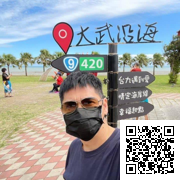

In [ ]:
im8

In [ ]:
def hello(name):
  """印出使用說明
  Test abc
  print
  
  
  """
  print("hello, ", name)

In [ ]:
hello("My")

hello,  My
